In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import special as s

(0.0, 4.0)

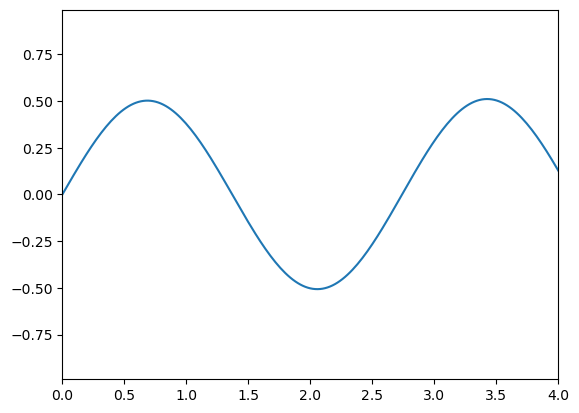

In [114]:
x = np.linspace(-360,100000,int(5e6))
risetime = 80
frequency = .365*np.pi*2
T2 = 2600
y = s.expit(x/risetime)*np.sin(x*frequency)*((x<risetime)+(x>risetime)*np.exp(-(x-risetime)/T2))
plt.plot(x,y)
plt.xlim(0,4)

(0.36485, 0.36515)

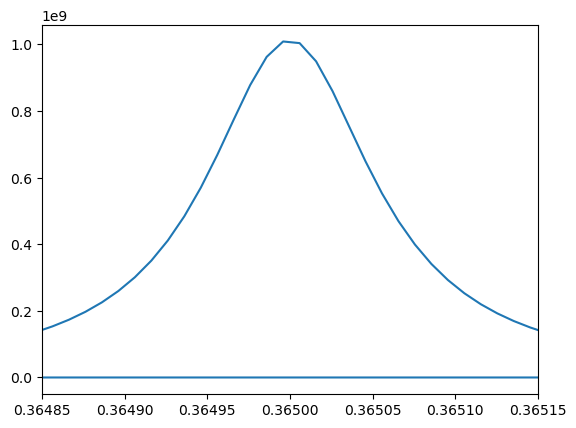

In [126]:
plt.plot(np.fft.fftfreq(len(x),x[0]-x[1]),np.abs(np.fft.fft(y))**2/4.4)
plt.xlim(.36485,.36515)

In [15]:
%matplotlib widget

['C:/Users/mattl/OneDrive - University of Cincinnati/Desktop/Lab Data/InP Nanowires On Saphire for FWM/powervwavelength/838nm\\0_25mW1mW0_25mWphotonechok1-1.0ps3.0psk3-3.0ps3.0psk2-4ps.csv', 'C:/Users/mattl/OneDrive - University of Cincinnati/Desktop/Lab Data/InP Nanowires On Saphire for FWM/powervwavelength/838nm\\0_5mW1mW0_5mWphotonechok1-1.0ps3.0psk3-3.0ps3.0psk2-4ps.csv', 'C:/Users/mattl/OneDrive - University of Cincinnati/Desktop/Lab Data/InP Nanowires On Saphire for FWM/powervwavelength/838nm\\1mW1mW1mWphotonechok1-1.0ps3.0psk3-3.0ps3.0psk2-4ps.csv', 'C:/Users/mattl/OneDrive - University of Cincinnati/Desktop/Lab Data/InP Nanowires On Saphire for FWM/powervwavelength/838nm\\2mW1mW2mWphotonechok1-1.0ps3.0psk3-3.0ps3.0psk2-4ps.csv', 'C:/Users/mattl/OneDrive - University of Cincinnati/Desktop/Lab Data/InP Nanowires On Saphire for FWM/powervwavelength/838nm\\3mW1mW3mWphotonechok1-1.0ps3.0psk3-3.0ps3.0psk2-4ps.csv', 'C:/Users/mattl/OneDrive - University of Cincinnati/Desktop/Lab Data/

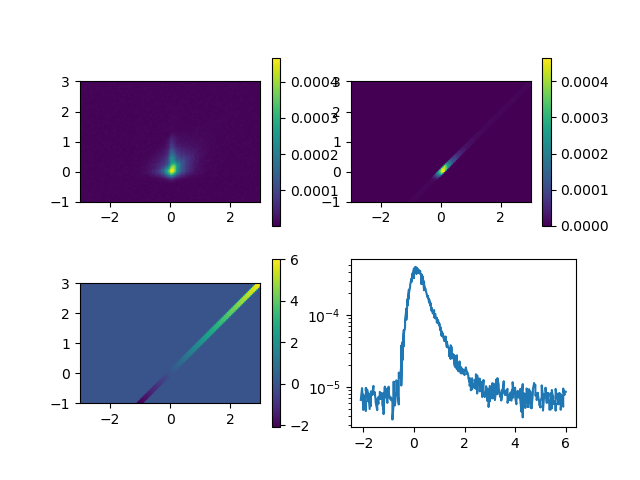

In [29]:
import numpy as np 
import matplotlib.pyplot as plt 
xmin = -3
xmax = 3 
ymin = -1
ymax = 3
Nx = 121
Ny = 81

import glob as gb 
directory = 'C:/Users/mattl/OneDrive - University of Cincinnati/Desktop/Lab Data/InP Nanowires On Saphire for FWM/powervwavelength/838nm/'
endmoniker = ''
filetype = '.csv'
outputfile = 'Results/'
integration= .15
files = gb.glob(directory+'*'+endmoniker+filetype)

print(files)
file = files[1]
for file in files : 
    print(file)
    filetag = file[len(directory):-4]
    contents = np.loadtxt(file,delimiter=';')
    t12 = contents[0,1:]
    t3ref = contents[1:,0]

#output = np.vstack((t3ref[1:],t3refcut[1:])).transpose()
#np.savetxt(directory+outputfile+filetag+'T3refcut'+filetype,output,delimiter=';')
#output = np.vstack((t12[1:],t12cut[1:])).transpose()
#np.savetxt(directory+outputfile+filetag+'T12cut'+filetype,output,delimiter=';')



    Nx = len(t12)
    Ny = len(t3ref)
    x = t12
    y = t3ref
    Z = np.zeros((Ny,Nx))
    ZM = np.zeros((Ny,Nx))
    R = np.zeros((Ny,Nx))
    XX,YY= np.meshgrid(x,y)
    Z = contents[1:,1:]
    Ns =5 # number of slices
    dx = x[1]-x[0]
    dy = y[1]-y[0]
    dr = np.sqrt(dx**2+dy**2)
    Rf = np.array([])
    ZMf = np.array([])
    for i in range(Ns):
        pos=dy*(i)-(Ns-Ns%2)*dy/2
        print(pos)
        R[np.abs(XX-YY-pos)<0.01*dx]= ((XX[np.abs(XX-YY-pos)<0.01])+(YY[np.abs(XX-YY-pos)<0.01]))#np.sign(XX[np.abs(XX-YY-pos)<0.01]+YY[np.abs(XX-YY-pos)<0.01]) 
        ZM[np.abs(XX-YY-pos)<0.01*dx]=Z[np.abs(XX-YY-pos)<0.01*dx] 
        Rf=np.append(Rf,R[np.abs(XX-YY-pos)<0.01*dx].flatten())
        ZMf = np.append(ZMf,ZM[np.abs(XX-YY-pos)<0.01*dx].flatten())

fig,ax = plt.subplots(2,2)
cset1 = ax[0,0].imshow(np.flipud(Z),extent=(xmin,xmax,ymin,ymax))
fig.colorbar(cset1)
cset2 = ax[1,0].imshow(np.flipud(R),extent=(xmin,xmax,ymin,ymax))
fig.colorbar(cset2)
cset2 = ax[0,1].imshow(np.flipud(ZM),extent=(xmin,xmax,ymin,ymax))
fig.colorbar(cset2)


Rind = np.argsort(Rf)

r = Rf[Rind]
z = ZMf[Rind]
ax[1,1].plot(r,z)
ax[1,1].set_yscale('log')


In [12]:
Nx*Ny

9801

In [7]:
t12

array([ 0.  , -3.  , -2.95, -2.9 , -2.85, -2.8 , -2.75, -2.7 , -2.65,
       -2.6 , -2.55, -2.5 , -2.45, -2.4 , -2.35, -2.3 , -2.25, -2.2 ,
       -2.15, -2.1 , -2.05, -2.  , -1.95, -1.9 , -1.85, -1.8 , -1.75,
       -1.7 , -1.65, -1.6 , -1.55, -1.5 , -1.45, -1.4 , -1.35, -1.3 ,
       -1.25, -1.2 , -1.15, -1.1 , -1.05, -1.  , -0.95, -0.9 , -0.85,
       -0.8 , -0.75, -0.7 , -0.65, -0.6 , -0.55, -0.5 , -0.45, -0.4 ,
       -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 , -0.05,  0.  ,  0.05,
        0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,  0.5 ,
        0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,  0.95,
        1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,  1.35,  1.4 ,
        1.45,  1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75,  1.8 ,  1.85,
        1.9 ,  1.95,  2.  ,  2.05,  2.1 ,  2.15,  2.2 ,  2.25,  2.3 ,
        2.35,  2.4 ,  2.45,  2.5 ,  2.55,  2.6 ,  2.65,  2.7 ,  2.75,
        2.8 ,  2.85,  2.9 ,  2.95,  3.  ])

In [33]:
5.88e12/80e6

73500.0